<a href="https://colab.research.google.com/github/manishramamoorthy/Guvi-Task/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

**Importing the dataset**

In [2]:
data = pd.read_csv("/content/Social_Network_Ads.csv")

**Splitting the dataset into the Training set and Test set**

In [3]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [5]:
X=data.drop(columns=['Purchased','User ID'])
Y=data['Purchased']

In [8]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=7)

**Feature Scaling**

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
x_test

array([[-0.97367959,  0.40859769,  1.07621104],
       [ 1.0270319 , -1.27184979, -0.34709751],
       [-0.97367959, -0.15155147,  0.1368274 ],
       [ 1.0270319 , -0.71170063,  0.47842145],
       [ 1.0270319 ,  0.3152395 ,  0.47842145],
       [ 1.0270319 ,  1.06210505, -1.20108264],
       [-0.97367959,  0.96874685,  1.93019617],
       [-0.97367959, -0.05819327,  0.02296271],
       [-0.97367959,  1.99568698,  0.50688762],
       [-0.97367959, -0.43162605, -0.03396963],
       [-0.97367959, -1.36520798, -0.63175922],
       [-0.97367959,  1.8089706 , -1.25801499],
       [-0.97367959, -0.61834244, -1.57114287],
       [ 1.0270319 ,  1.43553782,  0.05142888],
       [-0.97367959,  0.3152395 ,  0.27915825],
       [ 1.0270319 ,  2.08904518, -0.80255625],
       [ 1.0270319 ,  0.22188131, -0.31863134],
       [ 1.0270319 , -0.89841702,  0.25069208],
       [-0.97367959,  0.40859769,  0.1368274 ],
       [ 1.0270319 ,  0.96874685,  0.10836122],
       [-0.97367959, -0.80505882,  0.364

**Fitting SVM to the Training set**

In [13]:
clf=svm.SVC(kernel='linear',gamma='scale')
clf.fit(x_train,y_train)

SVC(kernel='linear')

**Predicting the Test set results**

In [14]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [15]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,61,7,68
1,7,25,32
All,68,32,100


**Visualising the Training set results**

In [16]:
training_score = clf.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 83.0


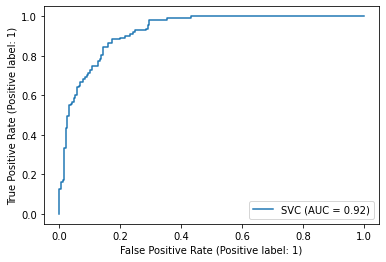

In [17]:
RocCurveDisplay.from_estimator(clf,x_train,y_train)

**Visualising the Test set results**

In [18]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 86.0


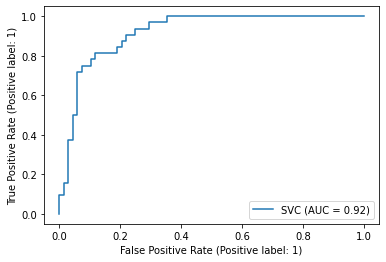

In [19]:
RocCurveDisplay.from_estimator(clf,x_test,y_test)